# NBA Ratings EDA & Neural Network Model

In [24]:
#Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
dfNBA = pd.read_csv('Resources/nba_rankings_2014-2020.csv')

In [3]:
dfNBA.head()

Unnamed: 0             PLAYER TEAM  AGE   SEASON  GP   W   L   MIN   PTS  \
0           0       Aaron Gordon  ORL   24  2019-20  62  30  32  32.5  14.4   
1           1      Aaron Holiday  IND   23  2019-20  66  42  24  24.5   9.5   
2           2        Abdel Nader  OKC   26  2019-20  55  37  18  15.8   6.3   
3           3        Adam Mokoka  CHI   21  2019-20  11   3   8  10.2   2.9   
4           4  Admiral Schofield  WAS   23  2019-20  33   9  24  11.2   3.0   

   ...  AST  TOV  STL  BLK   PF    FP   DD2  TD3  +/-  rankings  
0  ...  3.7  1.6  0.8  0.6  2.0  31.9  20.0  1.0 -1.1      80.0  
1  ...  3.4  1.3  0.8  0.2  1.8  19.3   3.0  0.0  1.7      76.0  
2  ...  0.7  0.8  0.4  0.4  1.4  11.1   0.0  0.0 -1.5      71.0  
3  ...  0.4  0.2  0.4  0.0  1.5   5.5   0.0  0.0  4.5      68.0  
4  ...  0.5  0.2  0.2  0.1  1.5   6.3   0.0  0.0 -1.7      71.0  

[5 rows x 32 columns]

In [4]:
dfNBA.shape

(2412, 32)

In [5]:
dfNBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2412 entries, 0 to 2411
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2412 non-null   int64  
 1   PLAYER      2412 non-null   object 
 2   TEAM        2412 non-null   object 
 3   AGE         2412 non-null   int64  
 4   SEASON      2412 non-null   object 
 5   GP          2412 non-null   int64  
 6   W           2412 non-null   int64  
 7   L           2412 non-null   int64  
 8   MIN         2412 non-null   float64
 9   PTS         2412 non-null   float64
 10  FGM         2412 non-null   float64
 11  FGA         2412 non-null   float64
 12  FG%         2412 non-null   float64
 13  3PM         2412 non-null   float64
 14  3PA         2412 non-null   float64
 15  3P%         2412 non-null   float64
 16  FTM         2412 non-null   float64
 17  FTA         2412 non-null   float64
 18  FT%         2412 non-null   float64
 19  OREB        2412 non-null  

In [6]:
duplicate_rows_df = dfNBA[dfNBA.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape )

number of duplicate rows:  (0, 32)


In [7]:
dfNBA.describe()

Unnamed: 0          AGE           GP            W            L  \
count  2412.000000  2412.000000  2412.000000  2412.000000  2412.000000   
mean    339.196103    26.314677    55.381012    27.982172    27.398839   
std     200.470761     4.148336    22.816590    15.299014    13.728032   
min       0.000000    19.000000     1.000000     0.000000     0.000000   
25%     170.000000    23.000000    40.000000    16.000000    17.000000   
50%     336.500000    26.000000    62.000000    28.000000    28.000000   
75%     509.250000    29.000000    74.000000    40.000000    37.000000   
max     795.000000    41.000000    83.000000    73.000000    68.000000   

               MIN          PTS          FGM          FGA          FG%  ...  \
count  2412.000000  2412.000000  2412.000000  2412.000000  2412.000000  ...   
mean     21.516086     9.445149     3.502239     7.693615    45.132546  ...   
std       8.762708     6.028712     2.161709     4.574182     8.848778  ...   
min       0.500000     0.000000     0.000000     0.000000     0.000000  ...   
25%      14.900000     5.000000     1.900000     4.200000    40.875000  ...   
50%      21.500000     8.000000     3.000000     6.700000    44.500000  ...   
75%      28.900000    12.800000     4.800000    10.600000    49.000000  ...   
max      38.700000    36.100000    10.900000    24.500000   100.000000  ...   

               AST          TOV          STL          BLK           PF  \
count  2412.000000  2412.000000  2412.000000  2412.000000  2412.000000   
mean      2.040547     1.226658     0.689096     0.442786     1.839096   
std       1.825906     0.812183     0.422630     0.437123     0.723557   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.800000     0.700000     0.400000     0.200000     1.400000   
50%       1.500000     1.000000     0.600000     0.300000     1.900000   
75%       2.600000     1.600000     0.900000     0.600000     2.300000   
max      11.700000     5.700000     2.400000     3.700000     5.000000   

                FP          DD2          TD3          +/-     rankings  
count  2412.000000  2412.000000  2412.000000  2412.000000  2412.000000  
mean     19.423839     5.009121     0.236318    -0.114594    75.656716  
std      10.780126    10.114069     1.708944     3.004522     5.797701  
min       0.000000     0.000000     0.000000   -18.000000    62.000000  
25%      11.600000     0.000000     0.000000    -1.900000    72.000000  
50%      17.500000     1.000000     0.000000    -0.200000    75.000000  
75%      25.700000     5.000000     0.000000     1.500000    78.000000  
max      60.600000    69.000000    42.000000    13.200000    98.000000  

[8 rows x 29 columns]

In [8]:
dfNBA.isnull()

Unnamed: 0  PLAYER   TEAM    AGE  SEASON     GP      W      L    MIN  \
0          False   False  False  False   False  False  False  False  False   
1          False   False  False  False   False  False  False  False  False   
2          False   False  False  False   False  False  False  False  False   
3          False   False  False  False   False  False  False  False  False   
4          False   False  False  False   False  False  False  False  False   
...          ...     ...    ...    ...     ...    ...    ...    ...    ...   
2407       False   False  False  False   False  False  False  False  False   
2408       False   False  False  False   False  False  False  False  False   
2409       False   False  False  False   False  False  False  False  False   
2410       False   False  False  False   False  False  False  False  False   
2411       False   False  False  False   False  False  False  False  False   

        PTS  ...    AST    TOV    STL    BLK     PF     FP    DD2    TD3  \
0     False  ...  False  False  False  False  False  False  False  False   
1     False  ...  False  False  False  False  False  False  False  False   
2     False  ...  False  False  False  False  False  False  False  False   
3     False  ...  False  False  False  False  False  False  False  False   
4     False  ...  False  False  False  False  False  False  False  False   
...     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
2407  False  ...  False  False  False  False  False  False  False  False   
2408  False  ...  False  False  False  False  False  False  False  False   
2409  False  ...  False  False  False  False  False  False  False  False   
2410  False  ...  False  False  False  False  False  False  False  False   
2411  False  ...  False  False  False  False  False  False  False  False   

        +/-  rankings  
0     False     False  
1     False     False  
2     False     False  
3     False     False  
4     False     False  
...     ...       ...  
2407  False     False  
2408  False     False  
2409  False     False  
2410  False     False  
2411  False     False  

[2412 rows x 32 columns]

In [9]:
dfNBA.isna().sum()

Unnamed: 0    0
PLAYER        0
TEAM          0
AGE           0
SEASON        0
GP            0
W             0
L             0
MIN           0
PTS           0
FGM           0
FGA           0
FG%           0
3PM           0
3PA           0
3P%           0
FTM           0
FTA           0
FT%           0
OREB          0
DREB          0
REB           0
AST           0
TOV           0
STL           0
BLK           0
PF            0
FP            0
DD2           0
TD3           0
+/-           0
rankings      0
dtype: int64

In [10]:
# Drop the non-beneficial ID columns
dfNBA = dfNBA.drop(columns=["PLAYER", "TEAM", "SEASON", "Unnamed: 0"], axis=1)

In [11]:
dfNBA.head()

AGE  GP   W   L   MIN   PTS  FGM   FGA   FG%  3PM  ...  AST  TOV  STL  BLK  \
0   24  62  30  32  32.5  14.4  5.4  12.4  43.7  1.2  ...  3.7  1.6  0.8  0.6   
1   23  66  42  24  24.5   9.5  3.5   8.5  41.4  1.3  ...  3.4  1.3  0.8  0.2   
2   26  55  37  18  15.8   6.3  2.2   4.8  46.8  0.9  ...  0.7  0.8  0.4  0.4   
3   21  11   3   8  10.2   2.9  1.1   2.5  42.9  0.5  ...  0.4  0.2  0.4  0.0   
4   23  33   9  24  11.2   3.0  1.1   2.8  38.0  0.6  ...  0.5  0.2  0.2  0.1   

    PF    FP   DD2  TD3  +/-  rankings  
0  2.0  31.9  20.0  1.0 -1.1      80.0  
1  1.8  19.3   3.0  0.0  1.7      76.0  
2  1.4  11.1   0.0  0.0 -1.5      71.0  
3  1.5   5.5   0.0  0.0  4.5      68.0  
4  1.5   6.3   0.0  0.0 -1.7      71.0  

[5 rows x 28 columns]

In [14]:
train_dataset = dfNBA.sample(frac=0.8, random_state=0)
test_dataset = dfNBA.drop(train_dataset.index)

In [15]:
train_dataset

AGE  GP   W   L   MIN   PTS  FGM   FGA   FG%  3PM  ...  AST  TOV  STL  \
964    20  69  22  47  29.7  15.2  5.9  14.8  39.5  1.5  ...  5.2  2.8  1.0   
2189   27  23   8  15  11.1   4.6  1.8   3.4  53.2  0.0  ...  0.1  0.8  0.1   
148    22  55  23  32  13.1   4.0  1.3   3.3  39.8  0.5  ...  2.1  0.7  0.4   
1989   30  34  16  18  11.7   3.7  1.4   2.3  62.8  0.0  ...  0.3  0.7  0.2   
981    26  81  30  51  21.8   7.8  2.9   6.3  46.7  1.1  ...  1.0  0.7  0.2   
...   ...  ..  ..  ..   ...   ...  ...   ...   ...  ...  ...  ...  ...  ...   
100    27  54  20  34  29.3  15.4  4.9  11.3  43.4  3.7  ...  1.7  1.1  0.7   
1270   22  82  47  35  17.9   5.1  1.8   4.0  45.7  0.5  ...  2.8  0.7  1.2   
1243   21  74  40  34  16.7   4.8  1.8   4.3  41.1  0.4  ...  0.6  0.6  0.5   
741    21  47  25  22  30.3   9.9  3.9   9.7  40.6  1.6  ...  5.4  2.2  1.5   
334    26  60  39  21  32.0  12.9  4.3  11.4  37.5  2.3  ...  4.9  1.7  1.7   

      BLK   PF    FP  DD2  TD3  +/-  rankings  
964   0.3  2.2  28.6  6.0  1.0 -4.7      78.0  
2189  0.9  1.3  10.1  0.0  0.0 -3.0      75.0  
148   0.1  1.0   9.9  0.0  0.0 -1.2      71.0  
1989  1.1  1.6  11.7  3.0  0.0  1.3      73.0  
981   0.2  1.5  12.8  0.0  0.0 -0.4      73.0  
...   ...  ...   ...  ...  ...  ...       ...  
100   0.6  2.6  26.2  1.0  0.0 -0.3      79.0  
1270  0.1  1.3  14.2  0.0  0.0  2.2      74.0  
1243  0.7  2.2  12.5  0.0  0.0 -2.2      72.0  
741   0.4  2.4  27.9  4.0  1.0 -0.3      79.0  
334   0.5  2.7  29.5  3.0  0.0  4.7      80.0  

[1930 rows x 28 columns]

In [16]:
test_dataset

AGE  GP   W   L   MIN   PTS  FGM   FGA   FG%  3PM  ...  AST  TOV  STL  \
0      24  62  30  32  32.5  14.4  5.4  12.4  43.7  1.2  ...  3.7  1.6  0.8   
3      21  11   3   8  10.2   2.9  1.1   2.5  42.9  0.5  ...  0.4  0.2  0.4   
7      28  66  21  45  26.6  15.0  4.9  11.6  41.8  1.8  ...  2.9  1.4  0.9   
24     35  55  24  31  15.9   3.6  1.2   3.3  35.7  0.9  ...  0.8  0.6  0.3   
25     26  11   6   5   4.2   1.0  0.4   1.3  28.6  0.0  ...  0.1  0.2  0.1   
...   ...  ..  ..  ..   ...   ...  ...   ...   ...  ...  ...  ...  ...  ...   
2376   31  52  43   9  18.8   5.3  2.0   4.8  41.8  0.5  ...  1.4  0.7  1.0   
2384   22  68  20  48  34.8  17.1  6.5  14.0  46.6  1.3  ...  1.8  1.7  1.0   
2385   33  63  46  17  26.2   8.6  3.6   7.2  49.5  0.2  ...  1.4  1.4  2.0   
2393   23  47  15  32   8.5   3.7  1.3   3.5  37.0  0.9  ...  0.5  0.4  0.1   
2408   28  78  28  50  31.7  13.9  5.4  12.5  42.9  1.8  ...  1.7  1.4  0.7   

      BLK   PF    FP   DD2  TD3  +/-  rankings  
0     0.6  2.0  31.9  20.0  1.0 -1.1      80.0  
3     0.0  1.5   5.5   0.0  0.0  4.5      68.0  
7     0.3  1.9  26.7   1.0  0.0 -3.4      77.0  
24    0.2  1.3   9.2   1.0  0.0 -1.9      71.0  
25    0.3  0.7   2.8   0.0  0.0 -1.1      67.0  
...   ...  ...   ...   ...  ...  ...       ...  
2376  0.4  1.3  16.2   1.0  0.0  3.3      74.0  
2384  0.5  2.0  30.4  11.0  0.0 -4.3      79.0  
2385  0.5  2.6  22.1   2.0  0.0  3.9      78.0  
2393  0.0  0.9   5.3   0.0  0.0 -1.8      67.0  
2408  0.4  3.0  25.7   8.0  0.0 -2.8      77.0  

[482 rows x 28 columns]

In [17]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('rankings')
test_labels = test_features.pop('rankings')

In [18]:
train_dataset.describe().transpose()[['mean', 'std']]

mean        std
AGE       26.291710   4.139905
GP        55.551295  22.775090
W         28.069430  15.274551
L         27.481865  13.591993
MIN       21.715959   8.750626
PTS        9.589378   6.066165
FGM        3.555181   2.173066
FGA        7.801295   4.614076
FG%       45.210155   8.758963
3PM        0.891606   0.819091
3PA        2.513834   2.129287
3P%       29.086736  14.342404
FTM        1.590415   1.418294
FTA        2.089067   1.743863
FT%       72.596839  16.710681
OREB       0.953990   0.819619
DREB       3.075855   1.854840
REB        4.025907   2.526636
AST        2.039482   1.792223
TOV        1.241451   0.819084
STL        0.697720   0.420675
BLK        0.450829   0.444565
PF         1.849171   0.714431
FP        19.671710  10.759107
DD2        5.152332  10.286392
TD3        0.230570   1.684620
+/-       -0.130933   2.946978
rankings  75.761658   5.740110

In [19]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [20]:
normalizer.adapt(np.array(train_features))

In [25]:
minutes = np.array(train_features['MIN'])
minutes_normalizer = layers.Normalization(input_shape=[1,], axis=None)
minutes_normalizer.adapt(minutes)

In [26]:
minutes_model = tf.keras.Sequential([
    minutes_normalizer,
    layers.Dense(units=1)
])

minutes_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [29]:
minutes_model.predict(minutes[:10])

array([[ 0.65751374],
       [-0.8742618 ],
       [-0.70955473],
       [-0.82484967],
       [ 0.00692081],
       [ 0.04809757],
       [-1.5742667 ],
       [-0.6189659 ],
       [ 0.2869229 ],
       [-0.6848487 ]], dtype=float32)

In [30]:
minutes_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [32]:
%%time
history = minutes_model.fit(
    train_features['MIN'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 5.11 s


In [33]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss  val_loss  epoch
95  2.739923  2.472350     95
96  2.738098  2.470912     96
97  2.738074  2.465001     97
98  2.737505  2.467465     98
99  2.737483  2.499238     99

In [34]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Rating]')
  plt.legend()
  plt.grid(True)

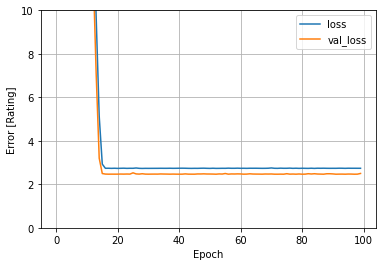

In [35]:
plot_loss(history)

In [36]:
test_results = {}

test_results['minutes_model'] = minutes_model.evaluate(
    test_features['Ratings'],
    test_labels, verbose=0)

In [37]:
x = tf.linspace(0.0, 250, 251)
y = minutes_model.predict(x)

In [42]:
def plot_Minutes(x, y):
  plt.scatter(train_features['MIN'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Min')
  plt.ylabel('Rating')
  plt.legend()

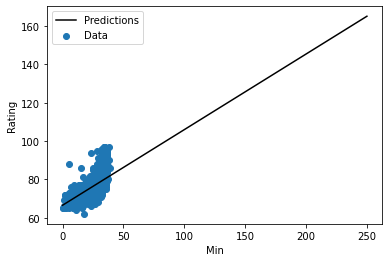

In [43]:
plot_Minutes(x, y)

In [44]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [45]:
linear_model.predict(train_features[:10])

array([[-0.42789006],
       [ 0.73184025],
       [ 1.3675945 ],
       [ 0.21806033],
       [ 0.2001549 ],
       [-2.1078322 ],
       [ 3.867203  ],
       [ 1.0530654 ],
       [-0.21810931],
       [ 1.1537923 ]], dtype=float32)

In [46]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(27, 1) dtype=float32, numpy=
array([[ 0.15736455],
       [ 0.19552791],
       [ 0.12742823],
       [-0.16960615],
       [-0.3636439 ],
       [-0.0420424 ],
       [-0.33948505],
       [ 0.29869133],
       [-0.3363238 ],
       [ 0.25033134],
       [-0.11230549],
       [-0.26682967],
       [-0.0466373 ],
       [-0.00893083],
       [-0.14824486],
       [-0.03905821],
       [-0.15062559],
       [ 0.03960431],
       [ 0.27971727],
       [-0.19608238],
       [ 0.11881471],
       [-0.14183864],
       [-0.14348531],
       [-0.41589123],
       [-0.41160956],
       [ 0.05979949],
       [-0.11296052]], dtype=float32)>

In [47]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [48]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 4.84 s


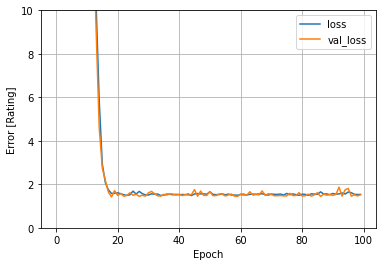

In [49]:
plot_loss(history)

In [50]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [51]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [52]:
dnn_min_model = build_and_compile_model(minutes_normalizer)

In [53]:
dnn_min_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [54]:
%%time
history = dnn_min_model.fit(
    train_features['MIN'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

Wall time: 4.97 s


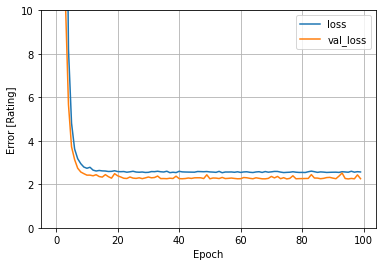

In [55]:
plot_loss(history)

In [56]:
x = tf.linspace(0.0, 250, 251)
y = dnn_min_model.predict(x)

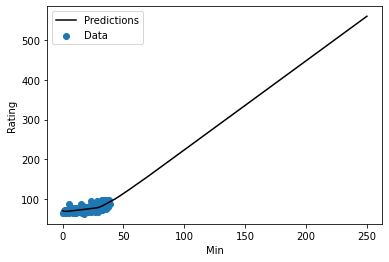

In [58]:
plot_Minutes(x, y)

In [61]:
test_results['dnn_min_model'] = dnn_min_model.evaluate(
    test_features['MIN'], test_labels,
    verbose=0)

In [62]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 27)               55        
 n)                                                              
                                                                 
 dense_5 (Dense)             (None, 64)                1792      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,072
Trainable params: 6,017
Non-trainable params: 55
_________________________________________________________________


In [63]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

Wall time: 5.1 s


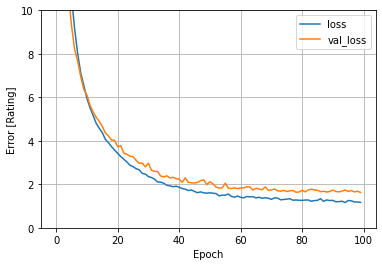

In [64]:
plot_loss(history)

In [65]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [66]:
pd.DataFrame(test_results, index=['Mean absolute error [Rating]']).T

Mean absolute error [Rating]
minutes_model                      2.703191
linear_model                       1.483855
dnn_min_model                      2.433627
dnn_model                          1.720007

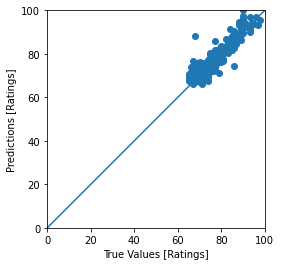

In [68]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Ratings]')
plt.ylabel('Predictions [Ratings]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

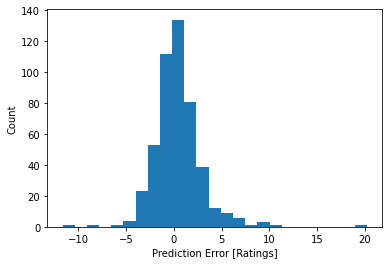

In [69]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Ratings]')
_ = plt.ylabel('Count')

In [70]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model\assets


In [71]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [73]:
pd.DataFrame(test_results, index=['Mean absolute error [Ratings']).T

Mean absolute error [Ratings
minutes_model                      2.703191
linear_model                       1.483855
dnn_min_model                      2.433627
dnn_model                          1.720007
reloaded                           1.720007